In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [32]:
df = pd.read_csv("Titanic-Dataset.csv")

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [34]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [36]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  
df = pd.get_dummies(df, columns=['Embarked']) 

In [37]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

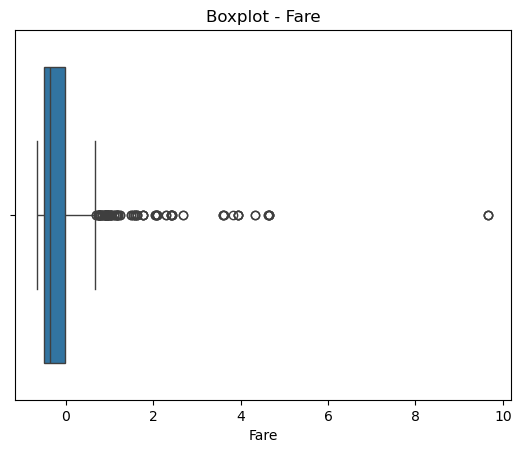

In [38]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()

In [39]:
df = df[df['Fare'] < 300]

In [40]:
df.to_csv("cleaned_Titanic.csv", index=False)

In [42]:
print("Cleaned Data Preview:")
print(df.head())

Cleaned Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False       False        True  
1      0          PC 17599  0.786845        True       False       False  
2      0  STON/O2. 3101282 -0.488854       False       False       